# Primer na papiru

In [6]:
from IPython import display

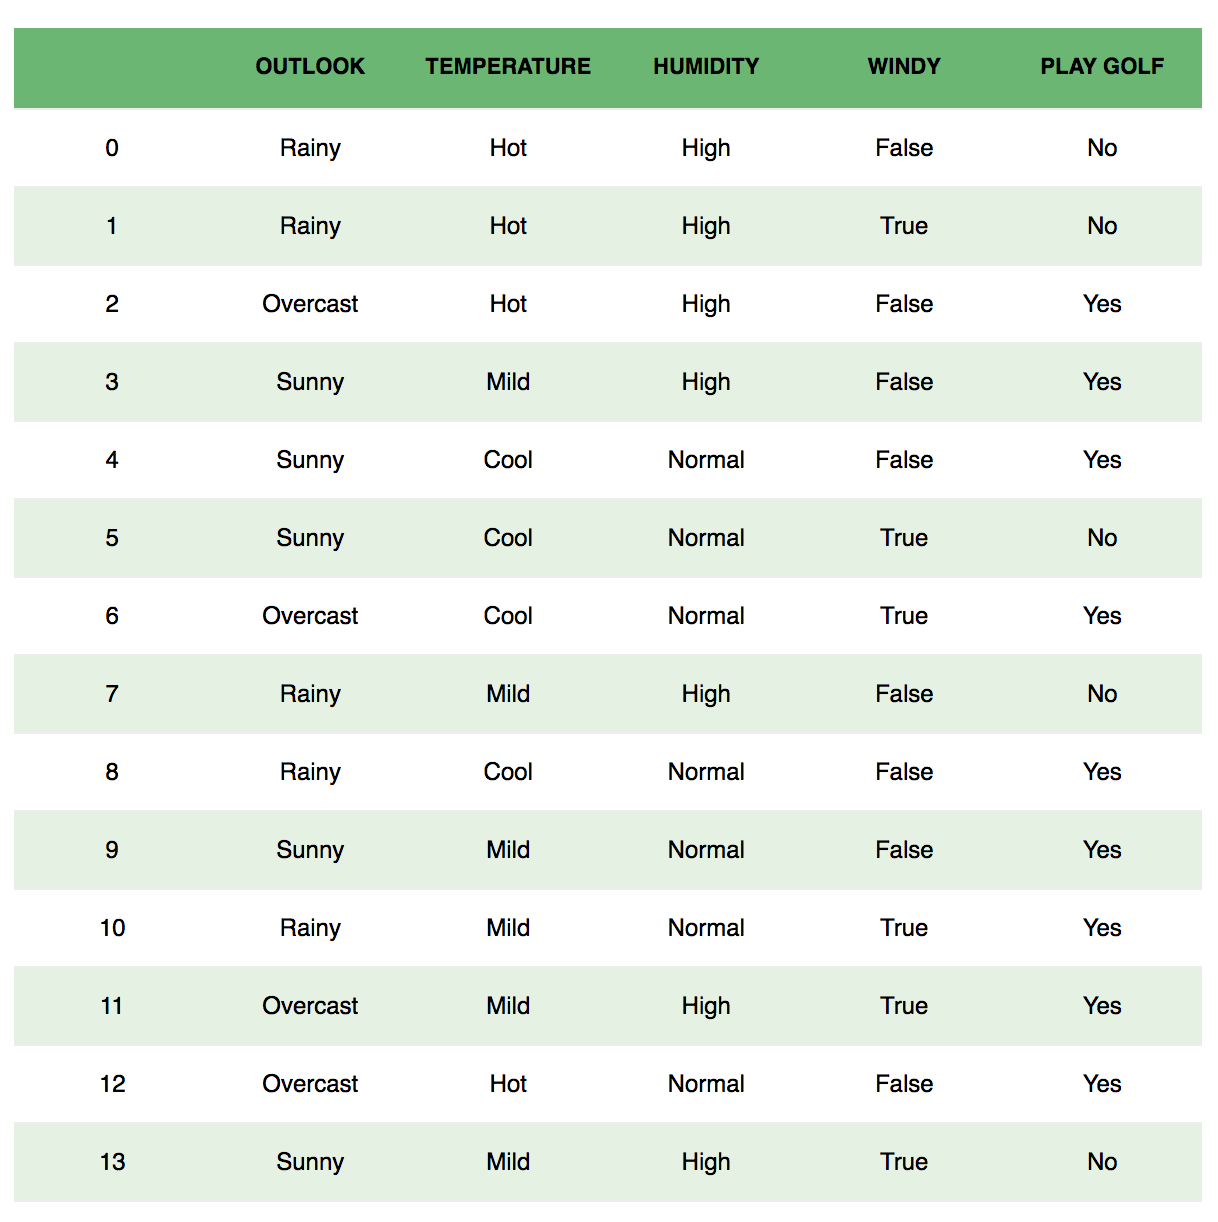

In [3]:
display.Image('naive_bayes_example.png')

In [4]:
# Ako je ovo nova instanca:
# today = (Sunny, Hot, Normal, False)
# Odrediti da li je danas pogodno vreme za golf.
# P(yes|today) = ?
# P(no|today) = ?

In [5]:
# Sta ako je nova instanca:
# today = (Overcast, Mild, Normal, True)

# Kod sa vežbi

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../ipVezbe7Inf/ballons.csv')

In [5]:
df.describe()

,color,size,act,age,inflated
count,76,76,76,76,76
unique,2,2,2,2,2
top,YELLOW,SMALL,DIP,CHILD,F
freq,40,40,38,38,41


In [9]:
feature_names = df.columns[:-1].tolist()

In [10]:
X = df[feature_names]
X

,color,size,act,age
0,YELLOW,SMALL,STRETCH,ADULT
1,YELLOW,SMALL,STRETCH,ADULT
2,YELLOW,SMALL,STRETCH,CHILD
3,YELLOW,SMALL,DIP,ADULT
4,YELLOW,SMALL,DIP,CHILD
...,...,...,...,...
71,PURPLE,SMALL,DIP,CHILD
72,PURPLE,LARGE,STRETCH,ADULT
73,PURPLE,LARGE,STRETCH,CHILD
74,PURPLE,LARGE,DIP,ADULT


In [11]:
y = df.iloc[:, -1]
y

0     T
1     T
2     F
3     F
4     F
     ..
71    F
72    F
73    F
74    F
75    F
Name: inflated, Length: 76, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [14]:
X_train.shape

(53, 4)

In [15]:
X_test.shape

(23, 4)

In [20]:
from sklearn.naive_bayes import CategoricalNB

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
oe = OrdinalEncoder()

In [23]:
oe.fit(X_train)

OrdinalEncoder()

In [25]:
oe.categories_

[array(['PURPLE', 'YELLOW'], dtype=object),
 array(['LARGE', 'SMALL'], dtype=object),
 array(['DIP', 'STRETCH'], dtype=object),
 array(['ADULT', 'CHILD'], dtype=object)]

In [27]:
X_train = oe.transform(X_train)

In [28]:
X_test = oe.transform(X_test)

In [29]:
model = CategoricalNB()

In [30]:
model.fit(X_train, y_train)

CategoricalNB()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.8260869565217391

In [34]:
model.category_count_

[array([[16., 13.],
        [ 8., 16.]]),
 array([[15., 14.],
        [ 7., 17.]]),
 array([[21.,  8.],
        [ 8., 16.]]),
 array([[12., 17.],
        [16.,  8.]])]

In [35]:
model.class_count_

array([29., 24.])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
confusion_matrix(y_test, y_pred)

array([[10,  2],
       [ 2,  9]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.83      0.83      0.83        12
           T       0.82      0.82      0.82        11

    accuracy                           0.83        23
   macro avg       0.83      0.83      0.83        23
weighted avg       0.83      0.83      0.83        23



In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline([('encoder', OrdinalEncoder()), ('classifier', CategoricalNB())])

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoder', OrdinalEncoder()), ('classifier', CategoricalNB())])

In [44]:
pipe['encoder'].categories_

[array([0., 1.]), array([0., 1.]), array([0., 1.]), array([0., 1.])]

In [46]:
pipe['classifier'].class_count_

array([29., 24.])

In [47]:
y_pred = pipe.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.8260869565217391

In [49]:
corpus = [
    'Chinese Beijing Chinese',
    'Chinese Chinese Shanghai',
    'Chinese Macao',
    'Tokyo Japan Chinese'
]

classes= ['yes', 'yes', 'yes', 'no']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [81]:
# vectorizer = CountVectorizer()
# TfidfVectorizer == CountVectorizer pa onda TfidTransformer

vectorizer = TfidfVectorizer()

In [82]:
X_train = vectorizer.fit_transform(corpus)

In [83]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [84]:
X_train.toarray()

array([[0.69183461, 0.722056  , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.722056  , 0.        , 0.        , 0.69183461,
        0.        ],
       [0.        , 0.46263733, 0.        , 0.88654763, 0.        ,
        0.        ],
       [0.        , 0.34618161, 0.66338461, 0.        , 0.        ,
        0.66338461]])

In [85]:
vectorizer.get_feature_names()

['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']

In [86]:
pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names())

,beijing,chinese,japan,macao,shanghai,tokyo
0,0.691835,0.722056,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.722056,0.000000,0.000000,0.691835,0.000000
2,0.000000,0.462637,0.000000,0.886548,0.000000,0.000000
3,0.000000,0.346182,0.663385,0.000000,0.000000,0.663385


In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
model = MultinomialNB()

In [89]:
model.fit(X_train, classes)

MultinomialNB()

In [90]:
test_doc = 'Chinese Chinese Chinese Tokyo Japan'

In [91]:
X_test = vectorizer.transform([test_doc])

In [92]:
X_test.toarray()

array([[0.       , 0.7420575, 0.4739993, 0.       , 0.       , 0.4739993]])

In [93]:
model.predict(X_test)

array(['yes'], dtype='<U3')